In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dados/facies_vector_edit.csv')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,Formation_numsk
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865,1.0,1
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665,1.0,1
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450,1.0,1
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065,1.0,1
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050,1.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Facies           4149 non-null   int64  
 1   Formation        4149 non-null   object 
 2   Well Name        4149 non-null   object 
 3   Depth            4149 non-null   float64
 4   GR               4149 non-null   float64
 5   ILD_log10        4149 non-null   float64
 6   DeltaPHI         4149 non-null   float64
 7   PHIND            4149 non-null   float64
 8   PE               3232 non-null   float64
 9   NM_M             4149 non-null   int64  
 10  RELPOS           4149 non-null   float64
 11  Labels_char      4149 non-null   object 
 12  PHID             4149 non-null   float64
 13  PHIN             4149 non-null   float64
 14  Formation_num    4149 non-null   float64
 15  Formation_numsk  4149 non-null   int64  
dtypes: float64(10), int64(3), object(3)
memory usage: 518.8+ KB


## Recuperação do PE por regressão linear

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
dataset = df[df.PE>-500].reset_index(drop=True) #Conjunto de df que possuem valor de PE
blind = df[df.PE<-500].reset_index(drop=True) #Conjunto que não possuem valor de PE

In [6]:
X = dataset[['Facies','PHIN','ILD_log10']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, dataset['PE'], test_size=0.33,random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print('Erro treinamento')
print(mean_squared_error(y_train,lr.predict(X_train)))
print('')
print('Erro teste')
print(mean_squared_error(y_test,lr.predict(X_test)))

Erro treinamento
0.3348580981645554

Erro teste
0.3211737235196638


In [10]:
df['PE_reg'] = lr.predict(df[['Facies','PHIN','ILD_log10']])
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,Formation_numsk,PE_reg
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865,1.0,1,3.378894
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665,1.0,1,3.256858
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450,1.0,1,3.222999
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065,1.0,1,3.240341
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050,1.0,1,3.242313


## Classificação 01 - KNN Classifier

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [12]:
columns = ['GR', 'ILD_log10','DeltaPHI', 'PHIND', 'NM_M','RELPOS', 'PHID','PHIN','Formation_num','PE_reg']

In [13]:
X = df[columns]
y = df['Facies']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
pca = PCA()
pca.fit(scaler.transform(X_train))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

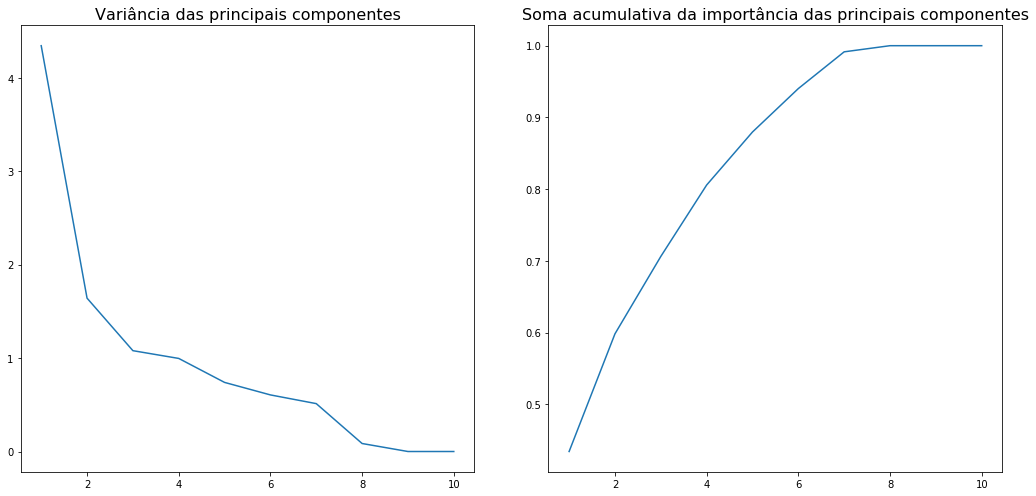

In [17]:
fig,axes = plt.subplots(ncols=2,figsize=(15,7))

n_comp = np.arange(1,len(pca.explained_variance_ratio_)+1)

axes[0].plot(n_comp,pca.explained_variance_)
axes[0].set_title('Variância das principais componentes',fontsize=16)


axes[1].plot(n_comp,np.cumsum(pca.explained_variance_ratio_))
axes[1].set_title('Soma acumulativa da importância das principais componentes',fontsize=16)



fig.tight_layout()

In [18]:
X_pca_train =  pca.transform(scaler.transform(X_train))[:,:7]

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_pca_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
print(classification_report(y_train,knn.predict(X_pca_train)))

              precision    recall  f1-score   support

           1       0.80      0.85      0.83       185
           2       0.83      0.86      0.85       614
           3       0.86      0.84      0.85       531
           4       0.81      0.89      0.85       184
           5       0.72      0.72      0.72       212
           6       0.81      0.80      0.80       377
           7       0.80      0.77      0.78        87
           8       0.88      0.84      0.86       476
           9       0.89      0.80      0.84       113

    accuracy                           0.83      2779
   macro avg       0.82      0.82      0.82      2779
weighted avg       0.83      0.83      0.83      2779



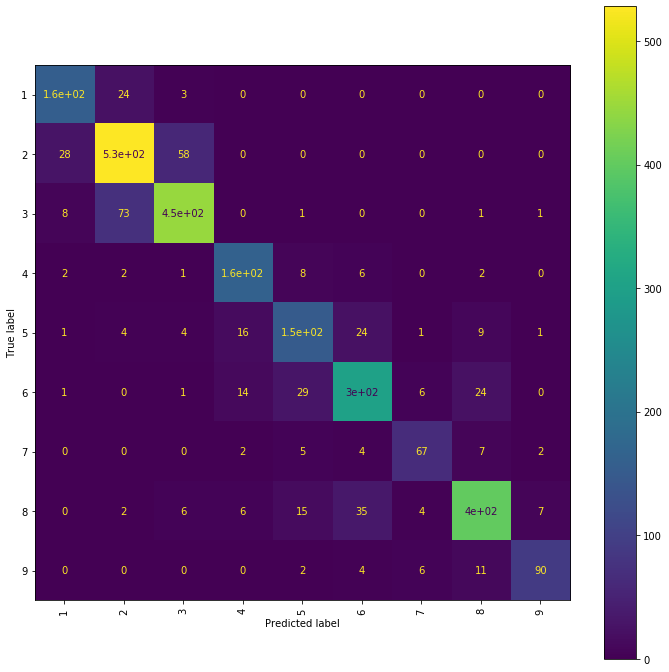

In [21]:
fig,axes = plt.subplots(figsize=(12,12))
plot_confusion_matrix(knn,X_pca_train,y_train,xticks_rotation='vertical',ax=axes)

In [22]:
X_pca_test = pca.transform(scaler.transform(X_test))[:,:7]

In [23]:
print(classification_report(y_test,knn.predict(X_pca_test)))

              precision    recall  f1-score   support

           1       0.71      0.70      0.70        83
           2       0.76      0.78      0.77       326
           3       0.75      0.75      0.75       249
           4       0.77      0.86      0.81        87
           5       0.53      0.56      0.54        84
           6       0.64      0.67      0.66       205
           7       0.81      0.54      0.64        54
           8       0.74      0.70      0.72       210
           9       0.79      0.75      0.77        72

    accuracy                           0.72      1370
   macro avg       0.72      0.70      0.71      1370
weighted avg       0.72      0.72      0.72      1370



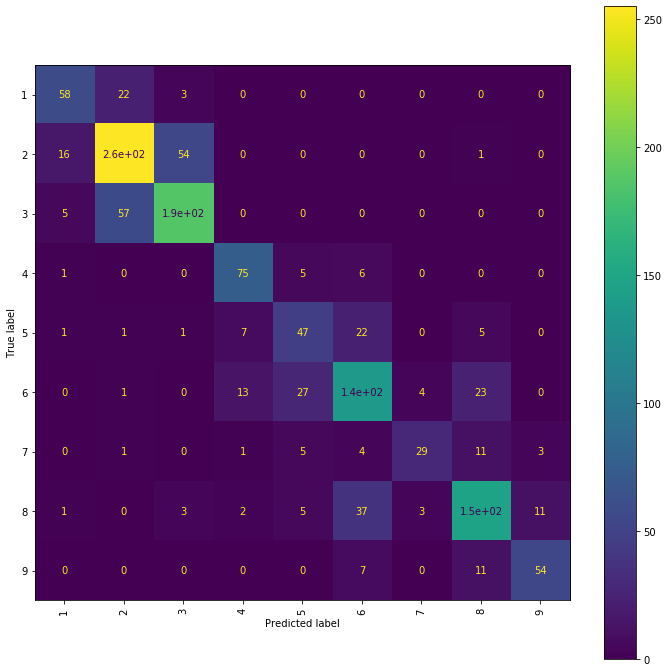

In [24]:
fig,axes = plt.subplots(figsize=(12,12))
plot_confusion_matrix(knn,X_pca_test,y_test,xticks_rotation='vertical',ax=axes)

## Classificação 02 - Decision Tree Classifier

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

In [26]:
X = df[columns]
y = df['Facies']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
print("Accuracy:",metrics.accuracy_score(y_train, dtc.predict(X_train)))
print('')
print('Erro treinamento')
print(mean_squared_error(y_train,dtc.predict(X_train)))

Accuracy: 0.8427491903562433

Erro treinamento
0.28355523569629365


In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, dtc.predict(X_test)))
print('')
print('Erro teste')
print(mean_squared_error(y_test,dtc.predict(X_test)))

Accuracy: 0.791970802919708

Erro teste
0.36423357664233574


In [32]:
print('Atributo \t Importância do atributo')
for i,j in zip(X_train.columns,dtc.feature_importances_):
    print(f'{i} \t \t {j}')

Atributo 	 Importância do atributo
GR 	 	 0.0
ILD_log10 	 	 0.035207049598502016
DeltaPHI 	 	 0.0
PHIND 	 	 0.011564656713109297
NM_M 	 	 0.2402934978266858
RELPOS 	 	 0.015947380672816938
PHID 	 	 0.0008960219560776833
PHIN 	 	 0.3071227030518814
Formation_num 	 	 0.0
PE_reg 	 	 0.3889686901809268


In [33]:
pd.DataFrame(zip(X_train.columns,dtc.feature_importances_)).sort_values(by=1,ascending=False)

,0,1
9,PE_reg,0.388969
7,PHIN,0.307123
4,NM_M,0.240293
1,ILD_log10,0.035207
5,RELPOS,0.015947
3,PHIND,0.011565
6,PHID,0.000896
0,GR,0.000000
2,DeltaPHI,0.000000
8,Formation_num,0.000000


In [34]:
X = df[['ILD_log10','PHIND','NM_M','PHID','PHIN','PE_reg']]
y = df['Facies']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
print("Accuracy:",metrics.accuracy_score(y_train, dtc.predict(X_train)))
print('')
print('Erro treinamento')
print(mean_squared_error(y_train,dtc.predict(X_train)))

Accuracy: 0.8351012536162006

Erro treinamento
0.2899389263902282


In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, dtc.predict(X_test)))
print('')
print('Erro teste')
print(mean_squared_error(y_test,dtc.predict(X_test)))

Accuracy: 0.7707129094412332

Erro teste
0.4393063583815029
